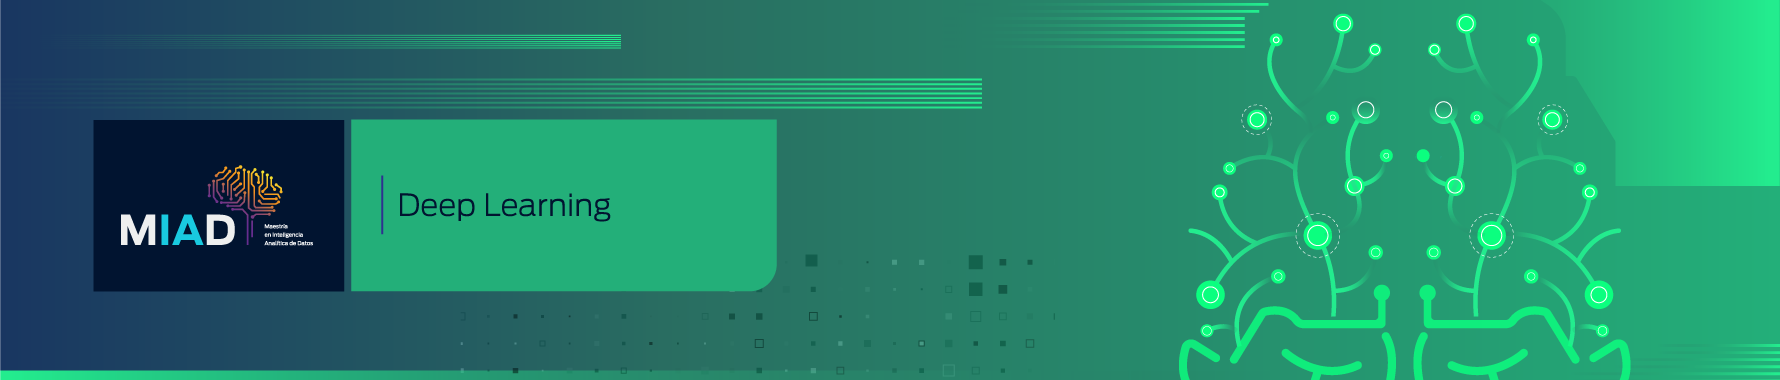

# Introducción al Deep Learning 
## Conceptos básicos de Deep Learning: Descenso de gradiente

### Caso Simple: Regresión Lineal
### Propósito 
El algoritmo de descenso de gradiente (o gradiente descendiente) es un algoritmo de optimización iterativo para encontrar el mínimo o máximo de una función objetivo $f(x)$ en términos de la variables $x$. En el contexto de Deep Learning, dicho algoritmo resulta de gran importancia y utilidad para minimizar el error de predicción, definido por una función de costo (o pérdida) de un modelo determinado. En este notebook se pretende aplicar el algoritmo en el caso de la regresión lineal y compararlo con un resultado analítico. Este caso se puede entender como una red neuronal con un solo nodo y con la función de activación identidad.
<div> <img src="attachment:tuto.png" width="550"/> </div>
Figura 1. Estructura de red neuronal para el caso de regresión lineal.

### Instrucciones generales

1. Para realizar la actividad solo siga las indicaciones asociadas a cada celda del notebook. Sin embargo, siéntase libre de modificar el archivo editando las celdas, lo que le permitirá afianzar su comprensión sobre las distintas funcionalidades de código.  

2. Recuerde que para esta actividad NO necesita realizar ningún tipo de entrega.

### Pasos para implementar manualmente el algoritmo de descenso de gradiente

1. Definir la función objetivo
2. Definir el gradiente de la función
3. Definir parámetros iniciales: Definir un punto o solución inicial, una tasa de aprendizaje y un criterio de parada.
4. Graficar el algoritmo de descenso gradiente.
5. Comparar con el resultado de un modelo analítico.

### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:

In [1]:
import numpy as np
from numpy.random import rand
from matplotlib import pyplot as plt

### 1. Definición de función objetivo

En este caso, la función de objetivo que queremos optimizar es la función de costo o pérdida que está definida como la suma de cuadrados de las diferencias entre el Y observado ($Y_i$) y el Y que se predice ($\hat{Y}_i=b_0+\omega_1 X_1+\omega_2 X_2$):
$$ L(b_0,\omega_1,\omega_2)=\frac{1}{n} \sum^n_{i=1} (Y_i-\hat{Y}_i)^2=\frac{1}{n} \sum^n_{i=1} (Y_i-b_0-\omega_1 X_1-\omega_2 X_2)^2$$
Plantearemos esta ecuación en función de un vector $W$ de forma que:
$$ W = \left[b_0,\omega_1,\omega_2\right]$$

In [2]:
# Definir función objetivo
def fobj(W):
    return (1/n)*np.sum(np.power((Y-W[0]*np.ones(n)-W[1]*X_1-W[2]*X_2),2))

### 2. Cálculo del gradiente

La idea en el algoritmo de descenso de gradiente es que en cada iteración se dé un paso en la dirección opuesta al gradiente de la función objetivo evaluada en el punto dado. Aquí aplicaremos el gradiente de una función multivariada ($\nabla L(b_0,\omega_1,\omega_2)$), por lo tanto:

$$ {\nabla L(b_0,\omega_1,\omega_2)} = \left[\frac{\partial L(b_0,\omega_1,\omega_2)}{\partial b_0}, \frac{\partial L(b_0,\omega_1,\omega_2)}{\partial \omega_1}, \frac{\partial L(b_0,\omega_1,\omega_2)}{\partial \omega_2}\right]$$

La solución de este gradiente es el siguiente:
$$
\begin{equation}
\nabla L(b_0,\omega_1,\omega_2) =  \begin{bmatrix}
\frac{-2}{n} \sum^n_{i=1} (Y_i-b_0-\omega_1 X_1-\omega_2 X_2)\\
\frac{-2}{n} \sum^n_{i=1} X_1(Y_i-b_0-\omega_1 X_1-\omega_2 X_2)\\
\frac{-2}{n} \sum^n_{i=1} X_2(Y_i-b_0-\omega_1 X_1-\omega_2 X_2)
\end{bmatrix}
\end{equation}
$$

In [3]:
# Definir gradiente de la función objetivo
def gradiente(W):
    return np.array(((-2/n)*np.sum((Y-W[0]*np.ones(n)-W[1]*X_1-W[2]*X_2)), 
                     (-2/n)*np.sum(X_1*(Y-W[0]*np.ones(n)-W[1]*X_1-W[2]*X_2)), 
                     (-2/n)*np.sum(X_2*(Y-W[0]*np.ones(n)-W[1]*X_1-W[2]*X_2))))

### Función descenso de gradiente

Habiendo definido nuestra función objetivo y su gradiente, debemos ahora definir un punto o solución inicial, una tasa de aprendizaje $\alpha$ (también llamada _step_ o tamaño del paso), y un criterio de parada para nuestro algoritmo iterativo. Estos elementos constituyen los parámetros de nuestra función de descenso de gradiente, en la que partimos de la solución inicial y actualizamos la solución en cada iteración de la siguiente manera:

$$ W^{k} =  W^{k-1} - \alpha*{\nabla L(W^{k-1})}$$

Lo anterior, se realiza hasta cumplir con el criterio de parada del algoritmo. En la función que se presenta a continuación, se seleccionó como criterio de parada que la norma del gradiente sea menor al nivel de tolerancia $(||\nabla f(X)||<\epsilon)$, lo cual está implementado utilizando _np.linalg.norm( )_.

In [4]:
# Función de descenso de gradiente
def descenso_gradiente(fun_obj, gradiente, sol_inicial, step, tolerancia):
    # Monitoreo de solución y función objetivo evaluada
    soluciones, feval, gradeval = list(), list(), list()
    # Cargar solución inicial
    solucion = sol_inicial
    # Definir variable booleana para validar si se cumplió el criterio de parada
    stop = False
    # Definir contador de iteraciones
    num_iter = 1
    while stop==False:
        # Evaluar gradiente
        gradiente_eval = gradiente(solucion)
        # Actualizar la solución
        solucion = solucion - step * gradiente_eval
        # Evaluar la solución
        solucion_eval = fun_obj(solucion)
        # Almacenar solución e imprimir resultados de la iteración
        soluciones.append(solucion)
        feval.append(solucion_eval)
        gradeval.append(gradiente_eval)
        print("Iteración "+str(num_iter)," - Solución: "+str(solucion)+". Gradiente: "+str(gradiente_eval)+". Función objetivo: "+str(format(solucion_eval,'.4f')))
        # Actualizar contador de iteraciones
        num_iter += 1
        # Validar si se cumplió el criterio de parada, es decir, si la norma del gradiente evaluado en la solución actual es menor a la tolerancia dada
        if (np.linalg.norm(gradiente_eval) < tolerancia):
            stop = True
    return [soluciones, feval, gradeval]

### 3. Definición de parámetros iniciales

Procedemos a probar la anterior función mediante nuestro algoritmo de descenso de gradiente. Las funciones objetivo y gradiente ya fueron definidas previamente, por lo que solo resta establecer la solución inicial, el tamaño del paso y la tolerancia. Para este caso, se sugieren los siguientes valores para los tres parámetros y se recomienda variarlos para observar su influencia sobre la velocidad de convergencia del algoritmo, el tiempo computacional de ejecución, y la exactitud del algoritmo. También, es importante ajustarlos en caso de que el algoritmo no converja a alguna solución.

In [5]:
# Definir tolerancia (Entre más baja sea, mejor será la solución, pero mayor el tiempo computacional)
tolerancia = 0.01
# Definir tamaño del paso (Si es muy pequeño, el algoritmo tomará mucho tiempo en encontrar el óptimo, pero tampoco
# puede definirse muy grande, pues se corre el riesgo de que dichos cambios grandes no permitan la convergencia del
# algoritmo)
step = 0.0025
# Definir solución inicial (Entre más cercana sea al óptimo, más rápido se alcanzará convergencia. Si se trata de una
# función con varios mínimos locales, la solución encontrada dependerá de esta solución inicial y del tamaño del
# paso, pues el algoritmo no distingue entre mínimos locales y globales. Sin embargo, con múltiples dimensiones esto
# no suele ser una mayor preocupación, pues el gradiente disminuye a cero solo en algunas dimensiones en dichos 
# mínimos locales)
sol_inicial = np.array((0,0,0))

Como se puede notar, iniciaremos el algoritmo con una solución con coeficientes iguales a 0, $[b_0,\omega_1,\omega_2]=[0,0,0]$. Los datos de entrada $X_1$ y $X_2$, y de salida $Y$ con los que trabajará serán los siguientes:

In [6]:
Y = np.array([-7.54,52.88,-0.95,13.50,-27.08,-20.85,0.39,54.86,50.16,19.33,-20.46,89.65,69.05,-0.64,8.14])
X_1 = np.array([1.24,7.71,10.24,6.74,3.30,4.00,11.55,12.30,10.97,4.28,1.06,12.49,10.84,11.51,9.62])
X_2 = np.array([5.35,3.51,19.11,9.40,13.24,13.46,21.61,10.84,9.12,5.30,8.31,2.84,4.94,21.46,15.95])
n = Y.size

Usamos la función descenso_gradiente, obteniendo las soluciones y el valor de la función objetivo en cada iteración:

In [7]:
# Llamar la función descenso de gradiente
soluciones, feval, gradeval = descenso_gradiente(fobj, gradiente, sol_inicial, step, tolerancia)

Iteración 1  - Solución: [0.09348    1.17886887 0.43988087]. Gradiente: [ -37.392      -471.54754667 -175.95234667]. Función objetivo: 1159.9243
Iteración 2  - Solución: [ 0.11607136  1.69335186 -0.01972926]. Gradiente: [  -9.03654591 -205.7931954   183.84405186]. Función objetivo: 979.1155
Iteración 3  - Solución: [ 0.14353193  2.22141102 -0.35762742]. Gradiente: [ -10.98422579 -211.22366534  135.15926314]. Función objetivo: 828.0349
Iteración 4  - Solución: [ 0.16863259  2.70103668 -0.6762658 ]. Gradiente: [ -10.04026475 -191.85026456  127.45535087]. Función objetivo: 700.5626
Iteración 5  - Solución: [ 0.19223209  3.14211726 -0.96817783]. Gradiente: [  -9.43979816 -176.43223175  116.7648112 ]. Función objetivo: 592.9973
Iteración 6  - Solución: [ 0.21438714  3.54721012 -1.23642112]. Gradiente: [  -8.86202152 -162.03714456  107.29731734]. Función objetivo: 502.2297
Iteración 7  - Solución: [ 0.23522133  3.91930154 -1.48283633]. Gradiente: [  -8.33367587 -148.83656718   98.56608255]. 

Mediante el algoritmo de descenso de gradiente con el criterio de parada definido, hemos encontrado luego de 7263 iteraciones que el mínimo se obtiene cuando $[b_0,\omega_1,\omega_2]=[8.27738254,7.63548444,-4.52224098]$, es decir, cuando la función tiene un valor de $2.4155$.

In [8]:
# Imprimir solución y el valor de la función objetivo en dicha solución
print(soluciones[-1]) 
print(feval[-1])

[ 8.27738254  7.63548444 -4.52224098]
2.4155297212509645


### 4. Graficar algoritmo de descenso de gradiente
Así como se presentó la solución en cada iteración al correr la función, podríamos también observarlo de manera gráfica generando un plot del valor de la función objetivo en cada iteración, en el cual observamos cómo va disminuyendo.

In [ ]:
# Graficar función objetivo en cada iteración
plt.plot(np.arange(len(feval))+1,feval)
plt.xlabel("Iteración")
plt.ylabel("Función objetivo")

In [ ]:
# Graficar función objetivo en cada iteración (primeras 50 iteraciones)
plt.plot(np.arange(len(feval))+1,feval)
plt.xlabel("Iteración")
plt.ylabel("Función objetivo")
plt.xlim([0, 50]) #Detalle inicial

### 5. Comparación con el resultado de un modelo analítico.

A continuación, compararemos los resultados obtenidos con los de la solución analítica a través del método de mínimos cuadrados. Para este caso podemos utilizar la función de *numpy*, *np.linalg.lstsq( )*, que utiliza el vector de salida $Y$ y una matriz $A$ con los datos de entrada $X_1$ y $X_2$, y una columna de unos: 
$$
\begin{equation}
A =  \begin{bmatrix}
1&X_{11}&X_{21}\\
1&X_{12}&X_{22}\\
...&...&...\\
1&X_{1i}&X_{2i}
\end{bmatrix}
\end{equation}
$$
Finalmente, reportamos el porcentaje de diferencia entre los coeficientes analíticos y los calculados por el algoritmo de descenso de gradiente:

In [9]:
A = np.vstack([np.ones(len(X_1)),X_1,X_2]).T
b, w_1, w_2 = np.linalg.lstsq(A, Y, rcond=None)[0]
b, w_1, w_2

(8.31038253510532, 7.633444628738191, -4.523334879125368)

In [10]:
#Imprime el porcentaje de diferencia para cada coeficiente
print("Porcentaje de diferencia para el coeficiente b: "+
      str(np.round_(100*np.abs((soluciones[-1][0]-b)/b), decimals=4))+" %")
print("Porcentaje de diferencia para el coeficiente w_1: "+
      str(np.round_(100*np.abs((soluciones[-1][1]-w_1)/w_1), decimals=4))+" %")
print("Porcentaje de diferencia para el coeficiente w_2: "+
      str(np.round_(100*np.abs((soluciones[-1][2]-w_2)/w_2), decimals=4))+" %")

Porcentaje de diferencia para el coeficiente b: 0.3971 %
Porcentaje de diferencia para el coeficiente w_1: 0.0267 %
Porcentaje de diferencia para el coeficiente w_2: 0.0242 %
